In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pop = 211049519
nutrient_ids = [1003, 1004, 1005]
food_person = 500
prot_person = 0.15
fat_person = 0.15
carbs_person = 0.7
food_pop_year = food_person * pop * 365 / 1000000
prot_pop_year = food_pop_year * prot_person
fat_pop_year = food_pop_year * fat_person
carbs_pop_year = food_pop_year * carbs_person

In [3]:
trade = pd.read_csv("trade.csv")
trade["Item"] = trade["Item"].str.lower()
trade

,Domain Code,Domain,Reporter Country Code (M49),Reporter Countries,Partner Country Code (M49),Partner Countries,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TM,Detailed trade matrix,76,Brazil,4,Afghanistan,5910,Export Quantity,21910.03,cake of soya beans,2019,2019,tonnes,513,A,Official figure
1,TM,Detailed trade matrix,76,Brazil,4,Afghanistan,5910,Export Quantity,F0666,chocolate products nes,2019,2019,tonnes,1,A,Official figure
2,TM,Detailed trade matrix,76,Brazil,4,Afghanistan,5910,Export Quantity,25020.01,cigarettes,2019,2019,tonnes,0,A,Official figure
3,TM,Detailed trade matrix,76,Brazil,4,Afghanistan,5910,Export Quantity,23912.02,coffee extracts,2019,2019,tonnes,109,A,Official figure
4,TM,Detailed trade matrix,76,Brazil,4,Afghanistan,5910,Export Quantity,22120,"cream, fresh",2019,2019,tonnes,185,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,TM,Detailed trade matrix,76,Brazil,887,Yemen,5910,Export Quantity,01970,unmanufactured tobacco,2019,2019,tonnes,1154,A,Official figure
15418,TM,Detailed trade matrix,76,Brazil,894,Zambia,5910,Export Quantity,22251.01,cheese from whole cow milk,2019,2019,tonnes,1,A,Official figure
15419,TM,Detailed trade matrix,76,Brazil,894,Zambia,5910,Export Quantity,23912.02,coffee extracts,2019,2019,tonnes,5,A,Official figure
15420,TM,Detailed trade matrix,76,Brazil,894,Zambia,5910,Export Quantity,F1232,food preparations n.e.c.,2019,2019,tonnes,3,A,Official figure


<AxesSubplot:title={'center':'Top 5 import partners'}, xlabel='Partner Countries', ylabel='Tonnes'>

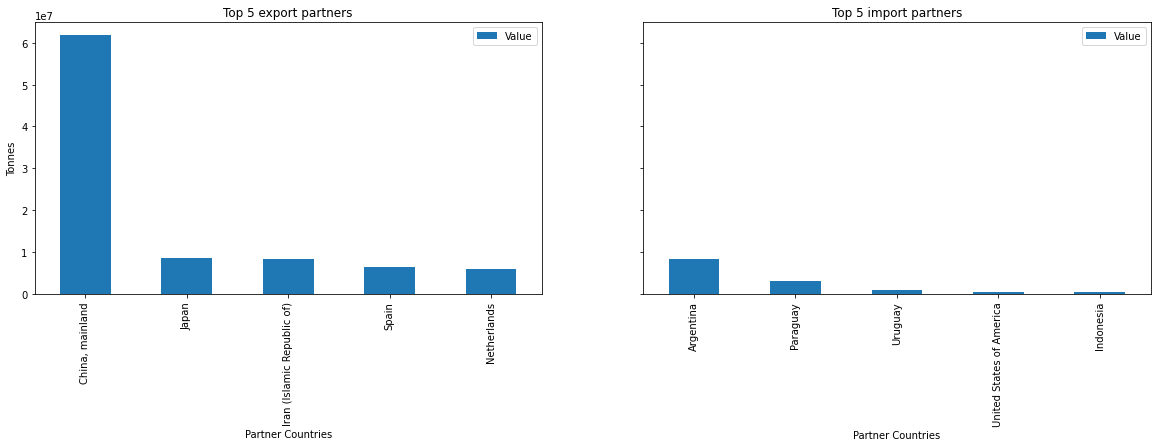

In [36]:
partners_exp = trade[trade["Element"] == "Export Quantity"][["Partner Countries", "Value"]].groupby("Partner Countries").sum().sort_values("Value", ascending=False)
partners_imp = trade[trade["Element"] == "Import Quantity"][["Partner Countries", "Value"]].groupby("Partner Countries").sum().sort_values("Value", ascending=False)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), sharey=True)
partners_exp.head(5).plot(ax=axs[0], kind="bar", ylabel="Tonnes", title="Top 5 export partners")
partners_imp.head(5).plot(ax=axs[1], kind="bar", ylabel="Tonnes", title="Top 5 import partners")

In [35]:
produce_total = pd.read_csv("produce-total.csv")
produce_total

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QV,Value of Agricultural Production,76,Brazil,58,Gross Production Value (constant 2014-2016 tho...,01341,Apples,2019,2019,1000 US$,412684,E,Estimated value
1,QV,Value of Agricultural Production,76,Brazil,58,Gross Production Value (constant 2014-2016 tho...,01311,Avocados,2019,2019,1000 US$,117883,E,Estimated value
2,QV,Value of Agricultural Production,76,Brazil,58,Gross Production Value (constant 2014-2016 tho...,01312,Bananas,2019,2019,1000 US$,3908784,E,Estimated value
3,QV,Value of Agricultural Production,76,Brazil,58,Gross Production Value (constant 2014-2016 tho...,0115,Barley,2019,2019,1000 US$,93920,E,Estimated value
4,QV,Value of Agricultural Production,76,Brazil,58,Gross Production Value (constant 2014-2016 tho...,01701,"Beans, dry",2019,2019,1000 US$,2892299,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,QV,Value of Agricultural Production,76,Brazil,58,Gross Production Value (constant 2014-2016 tho...,01499.02,Tung nuts,2019,2019,1000 US$,23,E,Estimated value
70,QV,Value of Agricultural Production,76,Brazil,58,Gross Production Value (constant 2014-2016 tho...,01970,Unmanufactured tobacco,2019,2019,1000 US$,2128649,E,Estimated value
71,QV,Value of Agricultural Production,76,Brazil,58,Gross Production Value (constant 2014-2016 tho...,01376,"Walnuts, in shell",2019,2019,1000 US$,9377,E,Estimated value
72,QV,Value of Agricultural Production,76,Brazil,58,Gross Production Value (constant 2014-2016 tho...,01221,Watermelons,2019,2019,1000 US$,305108,E,Estimated value


In [6]:
produce_value = pd.read_csv("produce-value-tons.csv")
produce_value

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,76,Brazil,5532,Producer Price (USD/tonne),1341.00,Apples,2019,2019,7021,Annual value,USD,379.0,A,Official figure
1,PP,Producer Prices,76,Brazil,5532,Producer Price (USD/tonne),1311.00,Avocados,2019,2019,7021,Annual value,USD,377.7,A,Official figure
2,PP,Producer Prices,76,Brazil,5532,Producer Price (USD/tonne),1312.00,Bananas,2019,2019,7021,Annual value,USD,280.0,A,Official figure
3,PP,Producer Prices,76,Brazil,5532,Producer Price (USD/tonne),115.00,Barley,2019,2019,7021,Annual value,USD,223.7,A,Official figure
4,PP,Producer Prices,76,Brazil,5532,Producer Price (USD/tonne),1701.00,"Beans, dry",2019,2019,7021,Annual value,USD,651.6,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,PP,Producer Prices,76,Brazil,5532,Producer Price (USD/tonne),1499.02,Tung nuts,2019,2019,7021,Annual value,USD,90.4,A,Official figure
60,PP,Producer Prices,76,Brazil,5532,Producer Price (USD/tonne),1970.00,Unmanufactured tobacco,2019,2019,7021,Annual value,USD,2210.4,A,Official figure
61,PP,Producer Prices,76,Brazil,5532,Producer Price (USD/tonne),1376.00,"Walnuts, in shell",2019,2019,7021,Annual value,USD,2488.8,A,Official figure
62,PP,Producer Prices,76,Brazil,5532,Producer Price (USD/tonne),1221.00,Watermelons,2019,2019,7021,Annual value,USD,171.0,A,Official figure


In [7]:
produce = produce_total[["Item", "Value"]].merge(produce_value[["Item", "Value"]], how="inner", on="Item")
produce["Item"] = produce["Item"].str.lower()
produce["Tonnes"] = produce["Value_x"] * 1000 / produce["Value_y"]
produce.rename(columns={"Value_x": "USD", "Value_y": "Per ton"}, inplace=True)
produce = produce.sort_values("Tonnes", ascending=False)
produce

,Item,USD,Per ton,Tonnes
52,sugar cane,16694363,18.4,9.073023e+08
51,soya beans,41510463,277.8,1.494257e+08
22,maize (corn),17115363,119.3,1.434649e+08
43,raw milk of cattle,13518972,304.5,4.439728e+07
9,"cassava, fresh",1800064,127.6,1.410708e+07
...,...,...,...,...
48,silk-worm cocoons suitable for reeling,8848,4909.0,1.802404e+03
56,tea leaves,222,198.2,1.120081e+03
59,tung nuts,23,90.4,2.544248e+02
42,quinces,132,1178.1,1.120448e+02


<AxesSubplot:title={'center':'Top 5 local agricultural products'}, xlabel='Item', ylabel='Tonnes'>

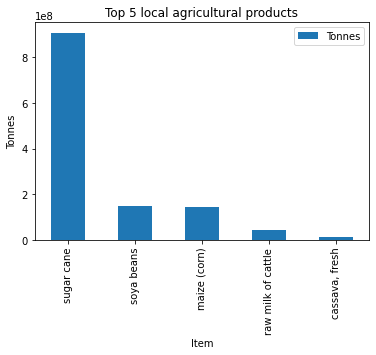

In [38]:
produce.head(5).plot("Item", "Tonnes", kind="bar", title="Top 5 local agricultural products", ylabel="Tonnes")

In [29]:
produce_total = produce["Tonnes"].sum()
trade_exp = trade[trade["Element"] == "Export Quantity"]["Value"].sum()
print("Total produced: " + str(produce_total) + " tonnes")
print("Total exported: " + str(trade_exp) + " tonnes")
print("Percentage of produced exported: " + str(trade_exp * 100 / produce_total) + "%")

Total produced: 1381977466.6555185 tonnes
Total exported: 172952497 tonnes
Percentage of produced exported: 12.514856513439184%


In [11]:
nutrient = pd.read_csv("nutrient.csv")
nutrient.rename(columns={"id":"nutrient_id"}, inplace=True)
nutrient

,nutrient_id,name,unit_name,nutrient_nbr,rank
0,2047,Energy (Atwater General Factors),KCAL,957.0,280.0
1,2048,Energy (Atwater Specific Factors),KCAL,958.0,290.0
2,1001,Solids,G,201.0,200.0
3,1002,Nitrogen,G,202.0,500.0
4,1003,Protein,G,203.0,600.0
...,...,...,...,...,...
469,2061,"Ergosta-7,22-dienol",MG,NaN,16211.0
470,2062,"Ergosta-5,7-dienol",MG,NaN,16211.0
471,2063,Verbascose,G,NaN,2450.0
472,2064,Oligosaccharides,MG,NaN,2250.0


In [12]:
food = pd.read_csv("food.csv")
food

,fdc_id,data_type,description,food_category_id,publication_date
0,319874,sample_food,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01
1,319875,market_acquisition,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01
2,319876,market_acquisition,"HUMMUS, SABRA CLASSIC",16.0,2019-04-01
3,319877,sub_sample_food,Hummus,16.0,2019-04-01
4,319878,sub_sample_food,Hummus,16.0,2019-04-01
...,...,...,...,...,...
50577,2353549,sub_sample_food,"MUSHROOMS, WHITE BUTTON",NaN,2022-10-28
50578,2353550,sub_sample_food,"MUSHROOMS, WHITE BUTTON",NaN,2022-10-28
50579,2353551,sub_sample_food,"MUSHROOMS, WHITE BUTTON",NaN,2022-10-28
50580,2353552,sub_sample_food,"MUSHROOMS, WHITE BUTTON",NaN,2022-10-28


In [13]:
food_nutrient = pd.read_csv("food_nutrient.csv")
food_nutrient

,fdc_id,nutrient_id,amount
0,319877,1051,56.30
1,319877,1002,1.28
2,319877,1004,19.00
3,319877,1007,1.98
4,319878,1091,188.00
...,...,...,...
130329,2353549,1079,1.78
130330,2353550,1079,1.80
130331,2353551,1079,1.77
130332,2353552,1079,1.72


In [14]:
food_portion = pd.read_csv("food_portion.csv")
food_portion

,id,fdc_id,seq_num,amount,measure_unit_id,portion_description,modifier,gram_weight,data_points,footnote,min_year_acquired
0,118702,319875,NaN,2.0,1001,NaN,NaN,35.8,1.0,NaN,NaN
1,118703,319880,NaN,2.0,1001,NaN,NaN,36.2,1.0,NaN,NaN
2,118704,319881,NaN,2.0,1001,NaN,NaN,33.4,1.0,NaN,NaN
3,118705,319886,NaN,2.0,1001,NaN,NaN,33.2,1.0,NaN,NaN
4,118706,319889,NaN,2.0,1001,NaN,NaN,34.6,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10673,267791,1105295,NaN,1.0,1119,NaN,Peel,56.7,1.0,NaN,NaN
10674,267792,1105295,NaN,1.0,1119,NaN,Peel,52.8,1.0,NaN,NaN
10675,267793,1105295,NaN,1.0,1119,NaN,Peel,53.2,1.0,NaN,NaN
10676,267794,1105295,NaN,1.0,1119,NaN,Peel,51.1,1.0,NaN,NaN


In [15]:
nutrients_merge = food_nutrient.merge(food[["fdc_id", "description"]], how="inner", on="fdc_id").merge(nutrient[["nutrient_id", "name"]], how="inner", on="nutrient_id").merge(food_portion[["fdc_id", "gram_weight"]], how="left", on="fdc_id")
nutrients_merge

,fdc_id,nutrient_id,amount,description,name,gram_weight
0,319877,1051,56.3,Hummus,Water,NaN
1,319882,1051,56.1,Hummus,Water,NaN
2,319892,1051,58.2,Hummus,Water,NaN
3,319899,1051,57.6,Hummus,Water,NaN
4,319908,1051,56.8,Hummus,Water,NaN
...,...,...,...,...,...,...
136503,2352642,1043,0.0,"applesauce, unsweetened, with vit C added",Pyruvic acid,NaN
136504,2352667,1043,0.0,"applesauce, unsweetened, with vit C added",Pyruvic acid,NaN
136505,2352692,1043,0.0,"applesauce, unsweetened, with vit C added",Pyruvic acid,NaN
136506,2352724,1043,0.0,"applesauce, unsweetened, with vit C added",Pyruvic acid,NaN


In [16]:
nutrients = nutrients_merge[nutrients_merge["nutrient_id"].isin(nutrient_ids)]
nutrients["description"] = nutrients["description"].str.lower()
nutrients["gram_weight"].fillna(0, inplace=True)
nutrients

C:\Users\mcani\AppData\Local\Temp/ipykernel_6676/2338116635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutrients["description"] = nutrients["description"].str.lower()
C:\Users\mcani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,fdc_id,nutrient_id,amount,description,name,gram_weight
6137,319877,1004,19.000000,hummus,Total lipid (fat),0.0
6138,319882,1004,18.700000,hummus,Total lipid (fat),0.0
6139,319892,1004,16.600000,hummus,Total lipid (fat),0.0
6140,319899,1004,19.100000,hummus,Total lipid (fat),0.0
6141,319908,1004,18.200000,hummus,Total lipid (fat),0.0
...,...,...,...,...,...,...
126072,2346410,1005,12.904375,"raspberries, raw","Carbohydrate, by difference",0.0
126073,2346411,1005,14.571775,"blueberries, raw","Carbohydrate, by difference",0.0
126074,2346412,1005,20.196825,"grapes, red, seedless, raw","Carbohydrate, by difference",0.0
126075,2346413,1005,18.603750,"grapes, green, seedless, raw","Carbohydrate, by difference",0.0


In [17]:
def find_nutrients(item):
    prot = []
    carbs = []
    fat = []
    weight = []
    for i in item.replace(".", "").replace(",", "").replace("(", "").replace(")", "").split(" "):
        if i == "":
            continue
        prot.extend(nutrients[(nutrients["description"].str.contains(i)) & (nutrients["nutrient_id"] == 1003)]["amount"])
        fat.extend(nutrients[(nutrients["description"].str.contains(i)) & (nutrients["nutrient_id"] == 1004)]["amount"])
        carbs.extend(nutrients[(nutrients["description"].str.contains(i)) & (nutrients["nutrient_id"] == 1005)]["amount"])
        weight.extend(nutrients[(nutrients["description"].str.contains(i)) & (nutrients["nutrient_id"] == 1005)]["gram_weight"])
    prot_avg = 0
    if len(prot) != 0:
        prot_avg = sum(prot) / len(prot)
    carbs_avg = 0
    if len(carbs) != 0:
        carbs_avg = sum(carbs) / len(carbs)
    fat_avg = 0
    if len(fat) != 0:
        fat_avg = sum(fat) / len(fat)
    weight_avg = 100
    if len(weight) != 0:
        weight_avg = max(weight)
        if weight_avg == 0:
            weight_avg = 100
    obj = {"Item": item, "protein": prot_avg, "fat": fat_avg, "carbs": carbs_avg, "weight": weight_avg}
    return obj

In [18]:
pn = []
for p in produce["Item"]:
    pn.append(find_nutrients(p))
pn_df = pd.DataFrame(pn)
produce_nutrients = produce.merge(pn_df, how="inner", on="Item")
produce_nutrients

,Item,USD,Per ton,Tonnes,protein,fat,carbs,weight
0,sugar cane,16694363,18.4,9.073023e+08,0.000000,0.317692,99.600000,188.0
1,soya beans,41510463,277.8,1.494257e+08,24.041973,1.281495,5.761225,129.0
2,maize (corn),17115363,119.3,1.434649e+08,6.200000,5.375833,80.800000,100.0
3,raw milk of cattle,13518972,304.5,4.439728e+07,10.572779,4.823557,8.857623,980.0
4,"cassava, fresh",1800064,127.6,1.410708e+07,0.000000,0.337312,0.000000,100.0
...,...,...,...,...,...,...,...,...
59,silk-worm cocoons suitable for reeling,8848,4909.0,1.802404e+03,2.022266,0.990470,11.159080,230.0
60,tea leaves,222,198.2,1.120081e+03,24.297778,6.476957,0.000000,525.0
61,tung nuts,23,90.4,2.544248e+02,16.415476,63.866923,15.687124,135.0
62,quinces,132,1178.1,1.120448e+02,0.000000,0.000000,0.000000,100.0


In [19]:
produce_nutrients["protein tonnes"] = produce_nutrients["Tonnes"] * produce_nutrients["protein"] / produce_nutrients["weight"]
produce_nutrients["fat tonnes"] = produce_nutrients["Tonnes"] * produce_nutrients["fat"] / produce_nutrients["weight"]
produce_nutrients["carbs tonnes"] = produce_nutrients["Tonnes"] * produce_nutrients["carbs"] / produce_nutrients["weight"]
produce_nutrients

,Item,USD,Per ton,Tonnes,protein,fat,carbs,weight,protein tonnes,fat tonnes,carbs tonnes
0,sugar cane,16694363,18.4,9.073023e+08,0.000000,0.317692,99.600000,188.0,0.000000e+00,1.533207e+06,4.806772e+08
1,soya beans,41510463,277.8,1.494257e+08,24.041973,1.281495,5.761225,129.0,2.784875e+07,1.484406e+06,6.673451e+06
2,maize (corn),17115363,119.3,1.434649e+08,6.200000,5.375833,80.800000,100.0,8.894824e+06,7.712434e+06,1.159196e+08
3,raw milk of cattle,13518972,304.5,4.439728e+07,10.572779,4.823557,8.857623,980.0,4.789823e+05,2.185233e+05,4.012800e+05
4,"cassava, fresh",1800064,127.6,1.410708e+07,0.000000,0.337312,0.000000,100.0,0.000000e+00,4.758487e+04,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
59,silk-worm cocoons suitable for reeling,8848,4909.0,1.802404e+03,2.022266,0.990470,11.159080,230.0,1.584756e+01,7.761859e+00,8.744856e+01
60,tea leaves,222,198.2,1.120081e+03,24.297778,6.476957,0.000000,525.0,5.183900e+01,1.381850e+01,0.000000e+00
61,tung nuts,23,90.4,2.544248e+02,16.415476,63.866923,15.687124,135.0,3.093707e+01,1.203654e+02,2.956439e+01
62,quinces,132,1178.1,1.120448e+02,0.000000,0.000000,0.000000,100.0,0.000000e+00,0.000000e+00,0.000000e+00


In [55]:
produce_pop_obj = [
    {"Nutrient": "Protein", "Produced": "Locally produced", "Tonnes": produce_nutrients["protein tonnes"].sum()},
    {"Nutrient": "Fat", "Produced": "Locally produced", "Tonnes": produce_nutrients["fat tonnes"].sum()},
    {"Nutrient": "Carbs", "Produced": "Locally produced", "Tonnes": produce_nutrients["carbs tonnes"].sum()},
    {"Nutrient": "Protein", "Produced": "Population need", "Tonnes": prot_pop_year},
    {"Nutrient": "Fat", "Produced": "Population need", "Tonnes": fat_pop_year},
    {"Nutrient": "Carbs", "Produced": "Population need", "Tonnes": carbs_pop_year}
    ]
produce_pop = pd.DataFrame(produce_pop_obj)
produce_pop

,Nutrient,Produced,Tonnes
0,Protein,Locally produced,4.311668e+07
1,Fat,Locally produced,1.453810e+07
2,Carbs,Locally produced,6.348783e+08
3,Protein,Population need,5.777481e+06
4,Fat,Population need,5.777481e+06
5,Carbs,Population need,2.696158e+07


<AxesSubplot:title={'center':'Nutrients produced locally and population needs'}, xlabel='Nutrient'>

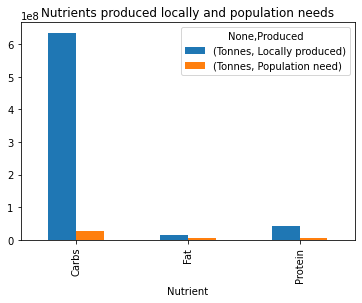

In [59]:
produce_pop.groupby(["Nutrient", "Produced"]).sum().sort_values("Tonnes", ascending=False).unstack().plot(kind="bar", title="Nutrients produced locally and population needs")

In [ ]:
tn = []
for p in trade["Item"].unique():
    tn.append(find_nutrients(p))
tn_df = pd.DataFrame(tn)
trade_nutrients = trade[["Partner Countries", "Value", "Item", "Element"]].merge(tn_df, how="inner", on="Item")
trade_nutrients

,Partner Countries,Value,Item,Element,protein,fat,carbs,weight
0,Afghanistan,513,cake of soya beans,Export Quantity,24.010684,1.394771,16.224490,690.0
1,Angola,133,cake of soya beans,Export Quantity,24.010684,1.394771,16.224490,690.0
2,Argentina,400,cake of soya beans,Export Quantity,24.010684,1.394771,16.224490,690.0
3,Australia,6383,cake of soya beans,Export Quantity,24.010684,1.394771,16.224490,690.0
4,Austria,24,cake of soya beans,Export Quantity,24.010684,1.394771,16.224490,690.0
...,...,...,...,...,...,...,...,...
15417,Spain,4,"meat of rabbits and hares, fresh or chilled",Import Quantity,19.774474,8.314965,11.085218,980.0
15418,Sri Lanka,79,"coir, raw",Import Quantity,10.721563,5.520572,9.722281,814.0
15419,United States of America,0,brewing or distilling dregs and waste,Export Quantity,19.600418,9.897755,10.880916,980.0
15420,United States of America,0,mules and hinnies,Export Quantity,4.704276,16.968529,14.831234,980.0


In [22]:
trade_nutrients["Protein traded"] = trade_nutrients["Value"] * trade_nutrients["protein"] / trade_nutrients["weight"]
trade_nutrients["Fat traded"] = trade_nutrients["Value"] * trade_nutrients["fat"] / trade_nutrients["weight"]
trade_nutrients["Carbs traded"] = trade_nutrients["Value"] * trade_nutrients["carbs"] / trade_nutrients["weight"]
trade_nutrients

,Partner Countries,Value,Item,Element,protein,fat,carbs,weight,Protein traded,Fat traded,Carbs traded
0,Afghanistan,513,cake of soya beans,Export Quantity,24.010684,1.394771,16.224490,690.0,17.851421,1.036982,12.062556
1,Angola,133,cake of soya beans,Export Quantity,24.010684,1.394771,16.224490,690.0,4.628146,0.268847,3.127329
2,Argentina,400,cake of soya beans,Export Quantity,24.010684,1.394771,16.224490,690.0,13.919237,0.808563,9.405501
3,Australia,6383,cake of soya beans,Export Quantity,24.010684,1.394771,16.224490,690.0,222.116224,12.902640,150.088289
4,Austria,24,cake of soya beans,Export Quantity,24.010684,1.394771,16.224490,690.0,0.835154,0.048514,0.564330
...,...,...,...,...,...,...,...,...,...,...,...
15417,Spain,4,"meat of rabbits and hares, fresh or chilled",Import Quantity,19.774474,8.314965,11.085218,980.0,0.080712,0.033939,0.045246
15418,Sri Lanka,79,"coir, raw",Import Quantity,10.721563,5.520572,9.722281,814.0,1.040545,0.535780,0.943563
15419,United States of America,0,brewing or distilling dregs and waste,Export Quantity,19.600418,9.897755,10.880916,980.0,0.000000,0.000000,0.000000
15420,United States of America,0,mules and hinnies,Export Quantity,4.704276,16.968529,14.831234,980.0,0.000000,0.000000,0.000000


In [23]:
trade_nutrients_ie = trade_nutrients[["Element", "Protein traded", "Fat traded", "Carbs traded"]].groupby("Element").sum()
trade_nutrients_ie["Protein population need"] = prot_pop_year
trade_nutrients_ie["Fat population need"] = fat_pop_year
trade_nutrients_ie["Carbs population need"] = carbs_pop_year
trade_nutrients_ie

,Protein traded,Fat traded,Carbs traded,Protein population need,Fat population need,Carbs population need
Element,,,,,,
Export Quantity,1.804801e+07,3.472873e+06,4.222936e+07,5.777481e+06,5.777481e+06,2.696158e+07
Import Quantity,3.011203e+06,1.369634e+06,1.627514e+07,5.777481e+06,5.777481e+06,2.696158e+07


<AxesSubplot:title={'center':'Carbs exported/imported and population need'}, xlabel='Element'>

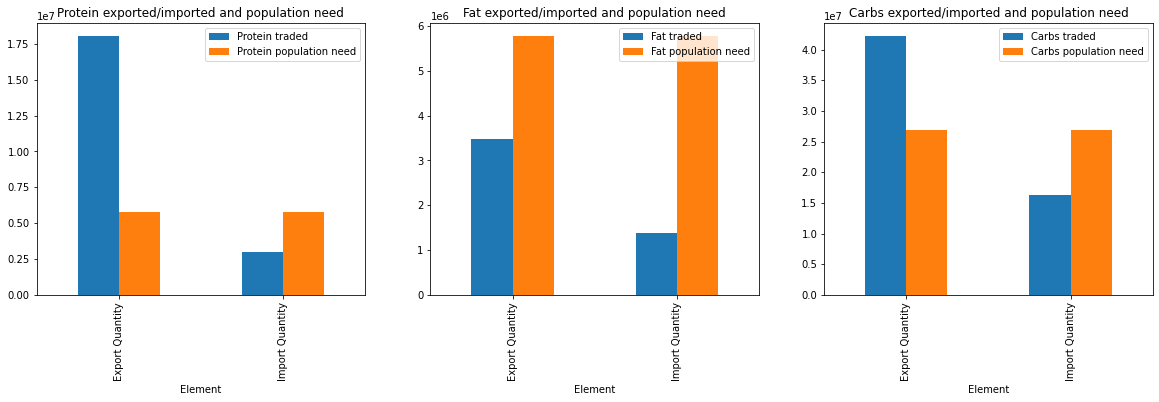

In [63]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharex=True)

trade_nutrients_ie[["Protein traded", "Protein population need"]].plot(ax=axs[0], kind="bar", title="Protein exported/imported and population need")
trade_nutrients_ie[["Fat traded", "Fat population need"]].plot(ax=axs[1], kind="bar", title="Fat exported/imported and population need")
trade_nutrients_ie[["Carbs traded", "Carbs population need"]].plot(ax=axs[2], kind="bar", title="Carbs exported/imported and population need")

<AxesSubplot:title={'center':'Nutrients available in the country'}, xlabel='Nutrient'>

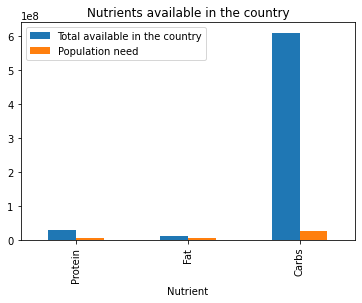

In [60]:
nutrients_available_obj = [
    {"Nutrient": "Protein", "Total available in the country": produce_nutrients["protein tonnes"].sum() - trade_nutrients[trade_nutrients["Element"] == "Export Quantity"]["Protein traded"].sum() + trade_nutrients[trade_nutrients["Element"] == "Import Quantity"]["Protein traded"].sum(), "Population need": prot_pop_year},
    {"Nutrient": "Fat", "Total available in the country": produce_nutrients["fat tonnes"].sum() - trade_nutrients[trade_nutrients["Element"] == "Export Quantity"]["Fat traded"].sum() + trade_nutrients[trade_nutrients["Element"] == "Import Quantity"]["Fat traded"].sum(), "Population need": fat_pop_year},
    {"Nutrient": "Carbs", "Total available in the country": produce_nutrients["carbs tonnes"].sum() - trade_nutrients[trade_nutrients["Element"] == "Export Quantity"]["Carbs traded"].sum()  + trade_nutrients[trade_nutrients["Element"] == "Import Quantity"]["Carbs traded"].sum(), "Population need": carbs_pop_year}
    ]
nutrients_available = pd.DataFrame(nutrients_available_obj)
nutrients_available.plot("Nutrient", ["Total available in the country", "Population need"], kind="bar", title="Nutrients available in the country")